<a href="https://colab.research.google.com/github/Crimpychimp777/actions-learning-pathway/blob/main/Norm_Elias_HW_5_weather_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Case Study

We will analyse the weather data and find the linear relationship between Temperature and other factors of weather.

### Read and Understand the dataset

In [58]:
# Import necessary Libraries
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set() will load seaborn's default theme and color palette to the session.
sns.set()
# split the data into train and test
from sklearn.model_selection import train_test_split
# to built linear regression_model using statsmodels
import statsmodels.api as sm
# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Read the dataset
df = pd.read_csv("/content/drive/MyDrive/SUU Data Analytics/Module 4/module 4 Homework/weather.csv")

##Data Overview:
Please check the fillowings;
- Shape of the dataset
- First and last 5 data points
- Check data types
- Get summary statistics


In [21]:
#check the shape of the data set
df.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [22]:
# Observe first and last 5 data points
df.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [23]:
df.tail()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1,Normal
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1,Normal
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1,Normal
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1,Normal
9999,11.138889,0.79,14.2485,131,10.2557,1010.14,1,Normal


In [24]:
# Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [25]:
# Get the statistical summary of the numerical variables
df.describe()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.857208,0.735272,10.813565,185.979700,10.372964,1004.896421,0.891200
std,9.512244,0.195498,6.972569,107.469909,4.178680,109.617120,0.311404
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.655556,0.600000,5.747700,112.000000,8.287475,1011.890000,1.000000
50%,11.561111,0.780000,9.933700,179.000000,10.046400,1016.500000,1.000000
75%,18.822222,0.900000,14.103600,290.000000,14.876400,1021.110000,1.000000
max,38.838889,1.000000,53.242700,359.000000,16.100000,1045.380000,1.000000


### EDA
#### Univariate Analysis

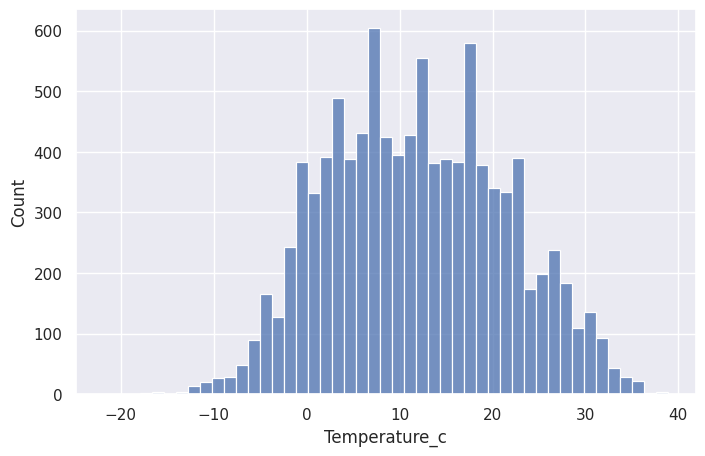

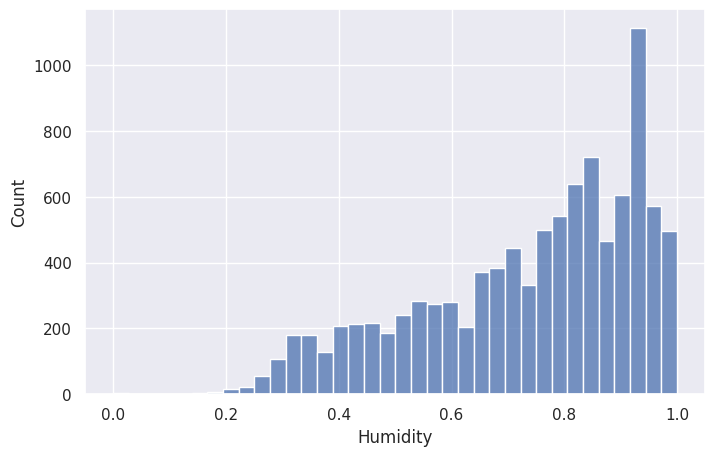

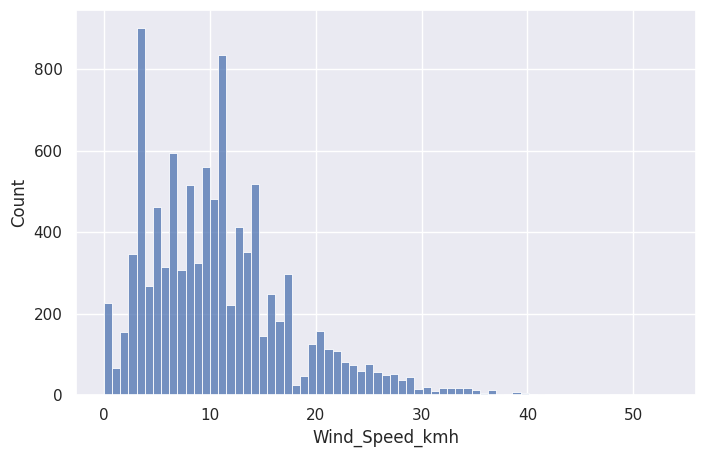

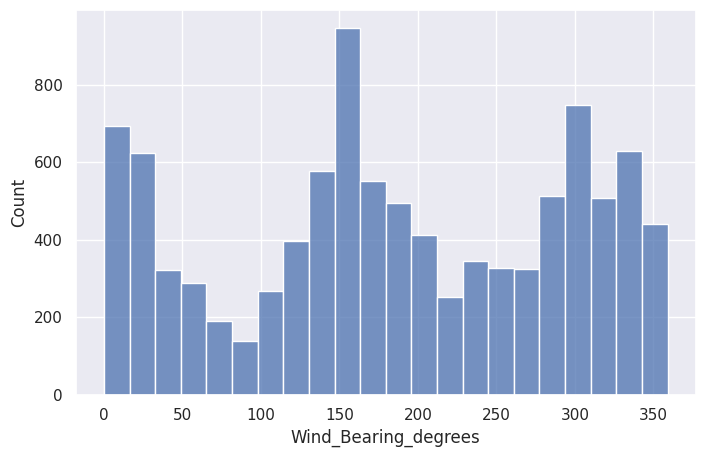

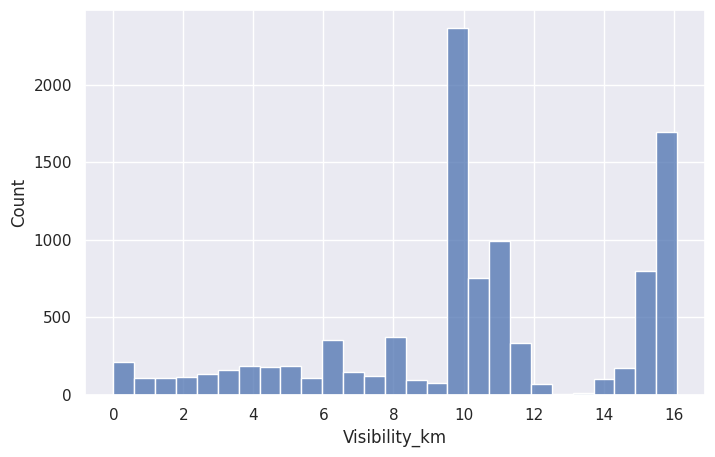

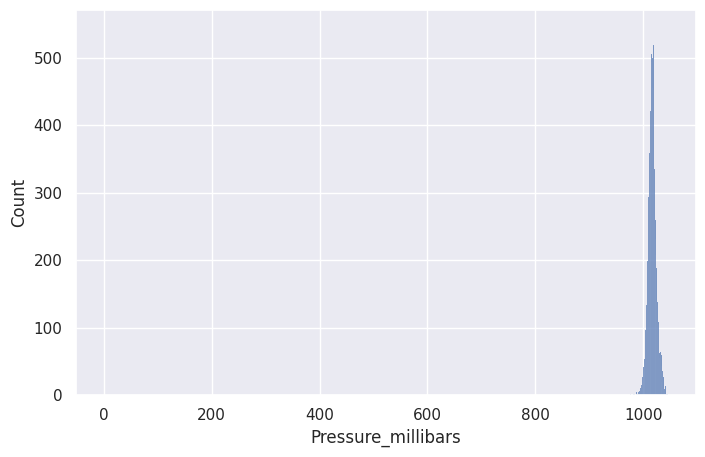

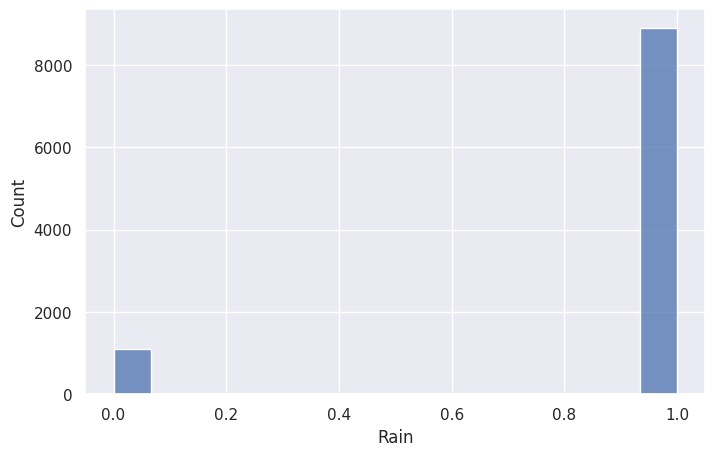

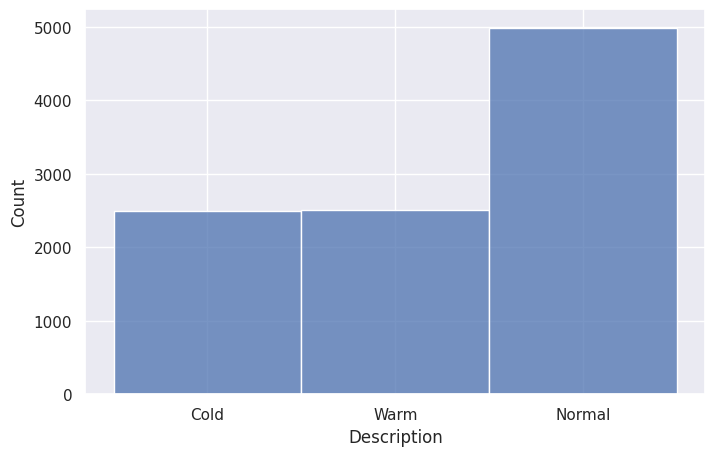

In [26]:
# Make a histogram of all variables [ Use for loop that I showed in the video]
for i in df.columns:
  plt.figure(figsize=(8,5))
  sns.histplot(data=df,x=i)
  plt.show()

Bivariate Analysis

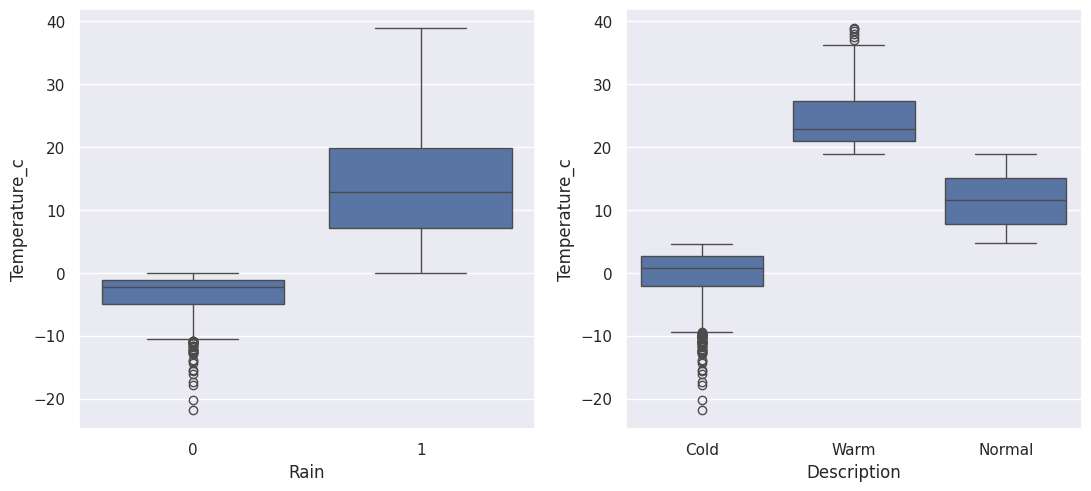

In [35]:
# Box plot for Categorical columns
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Rain', y = 'Temperature_c' , data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'Description' , y = 'Temperature_c' , data = df)

plt.show()

**Plot the scatterplots for features and the target variable `Temperature_c` and list your observations.**



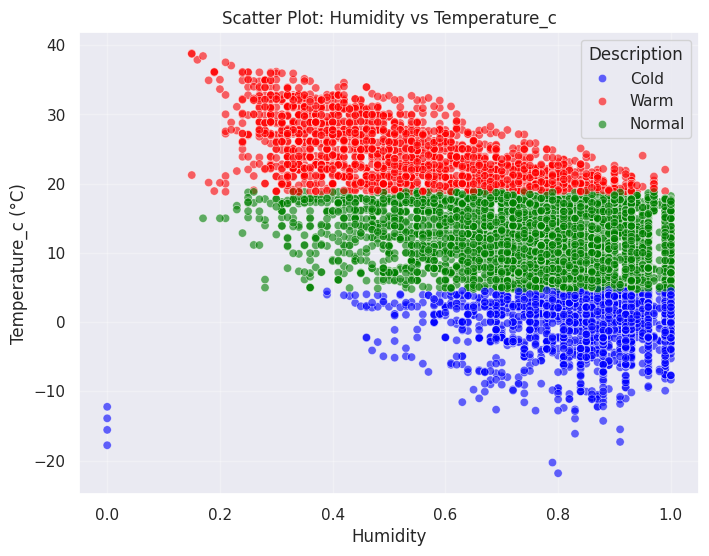

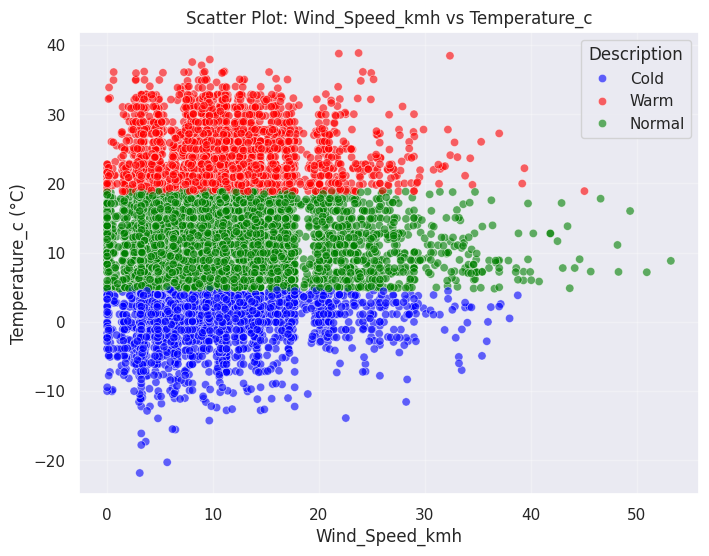

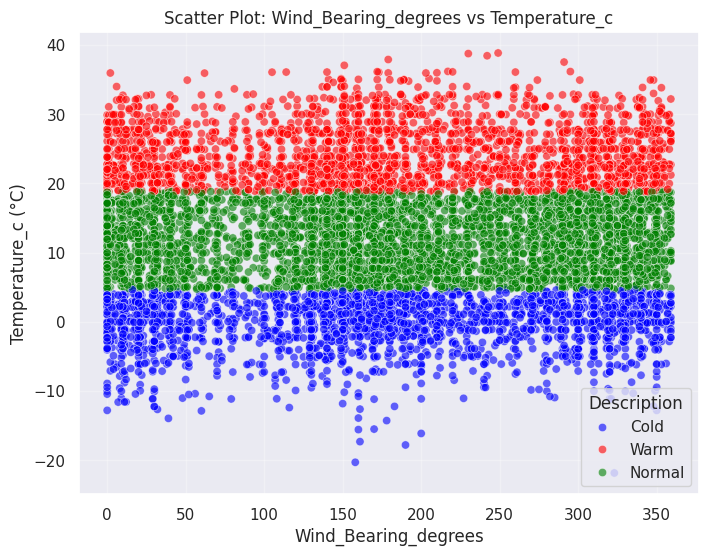

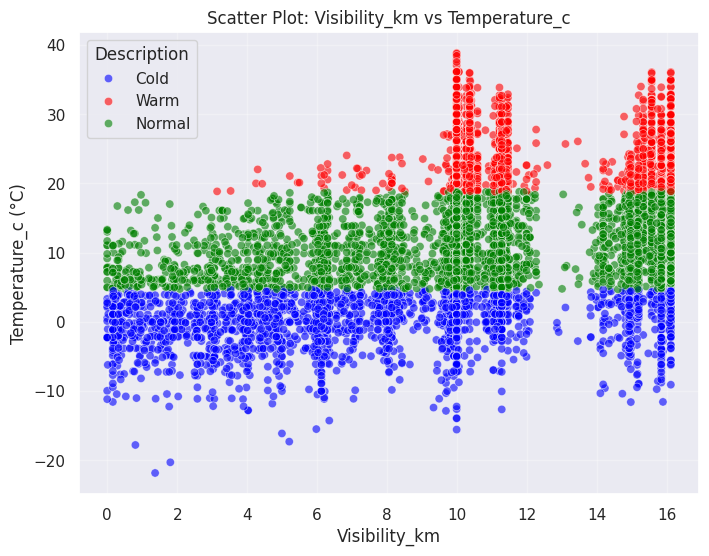

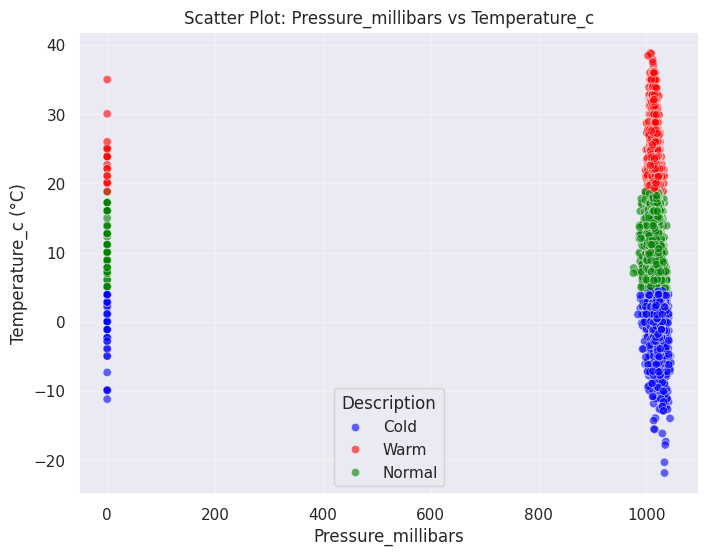

In [31]:
# let's plot the scatterplots of Temperature with all the features
# Select numerical features for scatter plots against the target
features = [
    'Humidity',
    'Wind_Speed_kmh',
    'Wind_Bearing_degrees',
    'Visibility_km',
    'Pressure_millibars']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df,
        x=feature,
        y='Temperature_c',
        hue='Description',
        palette={'Cold': 'blue', 'Normal': 'green', 'Warm': 'red'},
        alpha=0.6
    )
    plt.title(f'Scatter Plot: {feature} vs Temperature_c')
    plt.xlabel(feature)
    plt.ylabel('Temperature_c (°C)')
    plt.legend(title='Description')
    plt.grid(True, alpha=0.3)
    plt.show()

1. Humidity vs Temperature_c (strongest correlation: -0.63)Clear negative relationship: higher humidity strongly associates with lower temperatures.
Cold points cluster at high humidity (>0.8), Warm points at low humidity (<0.6).
Strongest linear-like trend among features.

2. Visibility_km vs Temperature_c (correlation: +0.39)Moderate positive relationship: higher temperatures link to better visibility.
Warm points often show visibility >10 km, Cold points more scattered with some low visibility.
Visible upward trend.

3. Wind_Speed_kmh vs Temperature_c (correlation: +0.01)Very weak/no clear pattern: points densely scattered across all wind speeds.
Slight spread at higher speeds in Normal/Warm, but no strong trend.

4. Wind_Bearing_degrees vs Temperature_c (correlation: +0.03)No discernible pattern: uniform scatter across 0–360° for all temperature categories.
Wind direction appears unrelated to temperature.

5. Pressure_millibars vs Temperature_c (correlation: +0.01)Extremely weak relationship: dense cloud with minor clustering.
Cold points slightly toward higher pressure in some cases, but overall negligible.



**Plot the correlation heatmap and list your observations.**




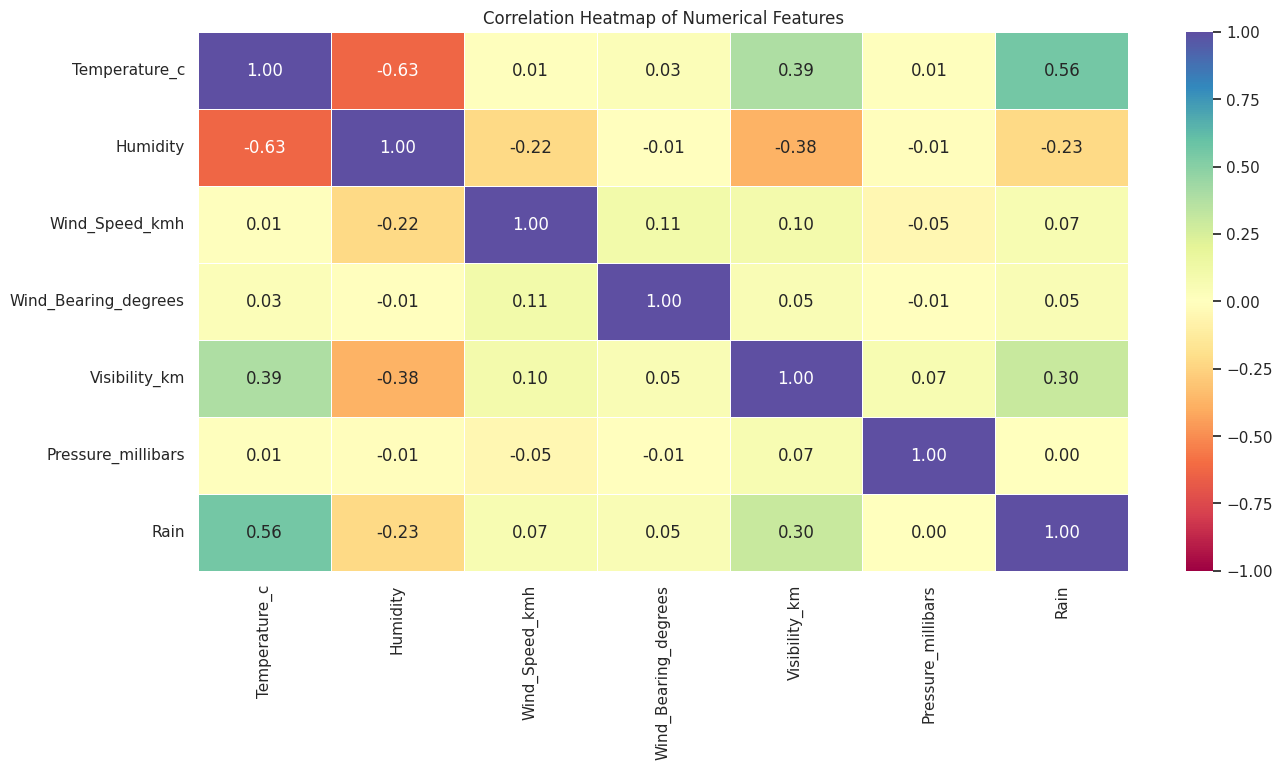

In [33]:
corr_matrix = df.corr(numeric_only=True)
# Plot the correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

List observations
Key Correlations with Target (Temperature_C)
1. Humidity: strong negative correlation (-.63) with coldest temperatures associated with the highest humidity and warmest being the lowest.
2. Rain: Moderate positive correlation (+.56) rain is much more common in waremer conditions. Rain = 0 mostly in cold temperatures.
3. Visibility_km: Moderate positie correlation (+.39) which means better visibility occurs at higher temperatures.
4. **all other observations are negligible.

##Split the dataset & Model building

Split the data into the dependent and independent variables, create dummy variables for the categorical variables, add a constant to the independent variables, and further split it in a ratio of 70:30 for train and test sets.




In [36]:
# Split the data into the dependent and independent variables, Temperature_c will be the dependent variable and the rest will be independent variables
x= df.drop(['Temperature_c', 'Description'], axis =1)
y= df['Temperature_c']

In [37]:
x.info()   # Check the Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Humidity              10000 non-null  float64
 1   Wind_Speed_kmh        10000 non-null  float64
 2   Wind_Bearing_degrees  10000 non-null  int64  
 3   Visibility_km         10000 non-null  float64
 4   Pressure_millibars    10000 non-null  float64
 5   Rain                  10000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 468.9 KB


In [43]:
# creating dummy variables
x=pd.get_dummies(
    x,columns=x.select_dtypes(include=["object","category"]).columns.tolist(),drop_first= True,
)
x.head()

,const,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain
0,1.0,0.92,11.2700,130,8.0500,1021.60,0
1,1.0,0.73,20.9300,330,16.1000,1017.00,1
2,1.0,0.97,5.9731,193,14.9086,1013.99,1
3,1.0,0.82,3.2200,300,16.1000,1031.59,1
4,1.0,0.60,10.8836,116,9.9820,1020.88,1


In [39]:
# Add constant term to the dataset
x=sm.add_constant(x)
x.head()

,const,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain
0,1.0,0.92,11.2700,130,8.0500,1021.60,0
1,1.0,0.73,20.9300,330,16.1000,1017.00,1
2,1.0,0.97,5.9731,193,14.9086,1013.99,1
3,1.0,0.82,3.2200,300,16.1000,1031.59,1
4,1.0,0.60,10.8836,116,9.9820,1020.88,1


In [46]:
#Splitting the data in 70:30 ratio for train and test data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=None
)

### Model Building

**Make the linear model using statsmodels OLS and print the model summary.**


In [51]:
model=sm.OLS(y_train,X_train)
fit_model = model.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Temperature_c   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     1785.
Date:                Mon, 02 Feb 2026   Prob (F-statistic):               0.00
Time:                        18:54:17   Log-Likelihood:                -22499.
No. Observations:                7000   AIC:                         4.501e+04
Df Residuals:                    6993   BIC:                         4.506e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   20.4275 

**Get the value of the coefficient of determination.**

In [49]:
print("The coefficient of determination (R-squared) is ", fit_model.rsquared)

The coefficient of determination (R-squared) is  0.6050081332600146


**Get the predictions on test set**

In [52]:
y_pred=fit_model.predict(X_test)
y_pred.head()

,0
6252,3.277734
4684,11.514869
1731,8.174533
4742,2.614074
4521,6.944379


**Observe the distribution of the errors**


<Axes: ylabel='Count'>

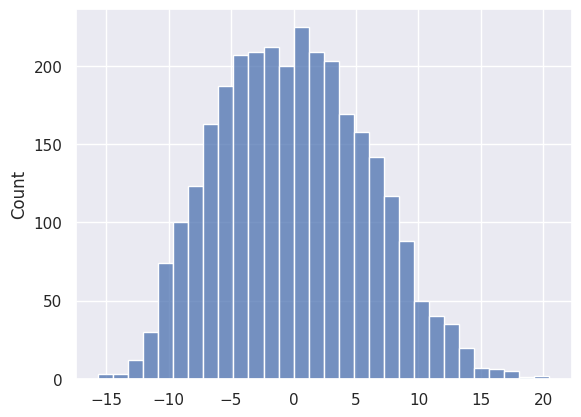

In [53]:
error =y_pred- y_test
error
sns.histplot(error)

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [54]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [59]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
# Call the function with the trained model, training predictors, and training target
olsmodel_train_perf = model_performance_regression(fit_model, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.020445,4.919004,0.605008,0.604613,inf


In [61]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(fit_model, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.935409,4.883603,0.59719,0.596248,inf


**Note:**

- You might get MAPE value inf. This is not a wrong answer, you can leave as is.

## Conclusions:







1. The linear regression model shows moderate performance, and explains 60% of the variation in temperature
2. No evidence of overfitting as the training and the test metrics are similar.
3. The error metrics inidicate accurate reporting: RMSE = 6c and MAE = 4.9c, this means the predictors are typically within 5-6c of the acutal values. This is acceptable
4. The key predictors are Humidity with strong negative effect, Rain with strong positive correlation with warmer conditions, and visibility being positive.
5. The models captures realistic physical relationships but the performace could improve with other features in addition to these variables like location or the seasons.